# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [1]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [4]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

ModuleNotFoundError: No module named 'plotnine'

In [6]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



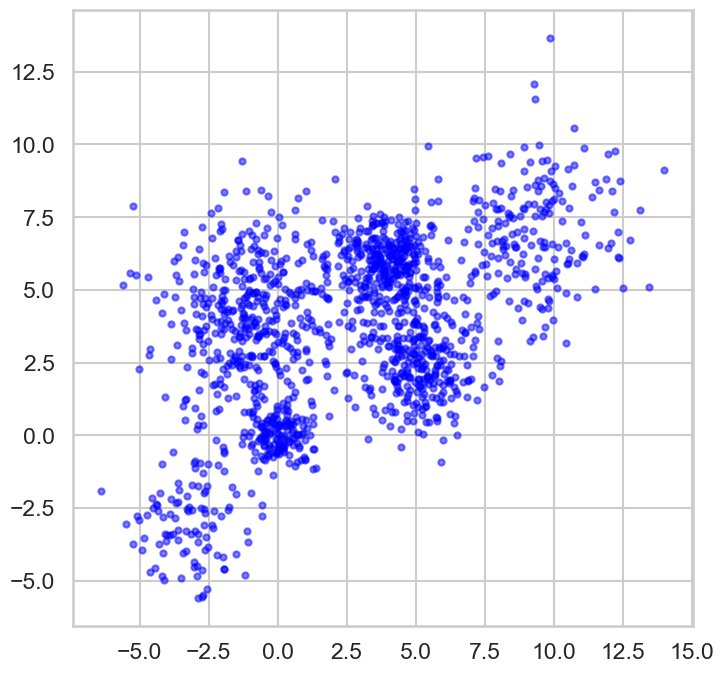

In [7]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [8]:
# Define range of k values to try
k_values = range(2, 11)

# Initialize arrays to store distortion and silhouette scores for each k value
distortions = np.zeros(len(k_values))
silhouette_scores = np.zeros(len(k_values))

# Iterate over k values and fit K-means models to the data
for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    
    # Compute distortion score for current k value
    distortions[i] = kmeans.inertia_
    
    # Compute silhouette score for current k value
    labels = kmeans.labels_
    silhouette_scores[i] = silhouette_score(data, labels)
    
    # Print cluster centers and sizes for current k value
    print(f"k={k}:")
    print(kmeans.cluster_centers_)
    print(np.bincount(labels))
    print("-----------------")

# Plot distortion vs. k
plt.plot(k_values, distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# Plot silhouette score vs. k
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

# Choose the best k value based on silhouette score
best_k = k_values[np.argmax(silhouette_scores)]
print(f"Best k value based on silhouette score: {best_k}")

# Fit K-means model with best k value and store silhouette score
best_kmeans = KMeans(n_clusters=best_k)
best_kmeans.fit(data)
best_silhouette_score = silhouette_score(data, best_kmeans.labels_)
print(f"Silhouette score for best k value: {best_silhouette_score}")

NameError: name 'KMeans' is not defined

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [9]:
# Define range of distance thresholds to try
distance_thresholds = [0.1, 0.25, 0.5, 0.75]

# Define affinity and linkage types to try
affinities = ['euclidean', 'manhattan', 'cosine']
linkages = ['average', 'single']

# Initialize variable to store best silhouette score
best_silhouette_score = -1

# Iterate over distance thresholds, affinity types, and linkage types
for distance_threshold in distance_thresholds:
    for affinity in affinities:
        for linkage in linkages:
            # Fit Agglomerative Clustering model with current parameters
            model = AgglomerativeClustering(n_clusters=None, distance_threshold=distance_threshold, affinity=affinity, linkage=linkage)
            model.fit(data)
            
            # Calculate silhouette score for current model
            labels = model.labels_
            silhouette = silhouette_score(data, labels)
            
            # Print information and plot dendrogram for current model
            print(f"Distance threshold: {distance_threshold}, Affinity: {affinity}, Linkage: {linkage}")
            print(f"Silhouette score: {silhouette}")
            dendrogram(model.fit(data))
            plt.show()
            
            # Update best silhouette score if current score is better
            if silhouette > best_silhouette_score:
                best_silhouette_score = silhouette

# Print best silhouette score
print(f"Best silhouette score: {best_silhouette_score}")

NameError: name 'AgglomerativeClustering' is not defined

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [10]:
# Define range of EPS and min_samples to try
EPS_values = np.linspace(0.1, 3, num=30)
min_samples_values = np.arange(5, 26, step=2)

# Initialize variables to store best silhouette score and parameters
best_silhouette_score = -1
best_EPS = 0
best_min_samples = 0

# Initialize variable to store silhouette scores for each combination of parameters
silhouette_scores = np.zeros((len(EPS_values), len(min_samples_values)))

# Iterate over EPS and min_samples values
for i, EPS in enumerate(EPS_values):
    for j, min_samples in enumerate(min_samples_values):
        # Fit DBSCAN model with current parameters
        model = DBSCAN(eps=EPS, min_samples=min_samples)
        model.fit(data)
        
        # Compute silhouette score for current model
        labels = model.labels_
        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if num_clusters > 1:
            silhouette = silhouette_score(data, labels)
            silhouette_scores[i, j] = silhouette
            # Update best silhouette score and parameters if current score is better
            if silhouette > best_silhouette_score:
                best_silhouette_score = silhouette
                best_EPS = EPS
                best_min_samples = min_samples
                
# Plot silhouette scores for each combination of parameters
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(silhouette_scores, cmap='viridis')
ax.set_xticks(np.arange(len(min_samples_values)))
ax.set_yticks(np.arange(len(EPS_values)))
ax.set_xticklabels(min_samples_values)
ax.set_yticklabels(np.around(EPS_values, decimals=2))
ax.set_xlabel('Min Samples')
ax.set_ylabel('EPS')
ax.set_title('Silhouette Scores for DBSCAN Clustering')
plt.colorbar(im)

# Fit DBSCAN model with best parameters and plot resulting clusters
model = DBSCAN(eps=best_EPS, min_samples=best_min_samples)
model.fit(data)
labels = model.labels_

num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters: {num_clusters}")
print(f"Best silhouette score: {best_silhouette_score}")

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = data[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)

plt.title('DBSCAN Clustering with Best Parameters')
plt.show()

NameError: name 'DBSCAN' is not defined

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

In [11]:
from sklearn.mixture import GaussianMixture

# Load data
data = np.loadtxt('data.txt')

# Fit a Gaussian mixture model with different covariance types
covariance_types = ['full', 'tied', 'diag', 'spherical']
models = [GaussianMixture(n_components=4, covariance_type=cov_type).fit(data) for cov_type in covariance_types]

# Plot the resulting distributions
x, y = np.meshgrid(np.linspace(-5, 5), np.linspace(-5, 5))
XX = np.array([x.ravel(), y.ravel()]).T

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
ax = ax.ravel()
for i, (cov_type, model) in enumerate(zip(covariance_types, models)):
    prob = model.score_samples(XX)
    prob = np.exp(prob).reshape(x.shape)
    ax[i].contour(x, y, prob)
    ax[i].scatter(data[:, 0], data[:, 1], s=5, alpha=0.5)
    ax[i].set_title(f'GMM with {cov_type} covariance type')

plt.tight_layout()
plt.show()

OSError: data.txt not found.

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 